<a href="https://colab.research.google.com/github/mladbago/podstawy_sztucznej_inteligencji/blob/main/Z09_H_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Decision Trees

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

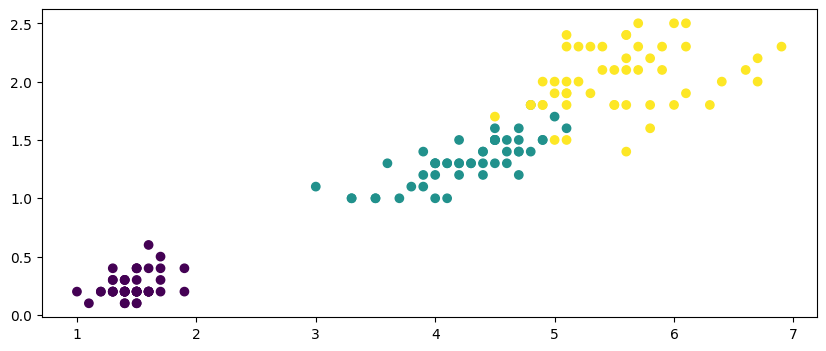

In [3]:
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Wizualizacja
Możesz wizualizować nauczone drzewo decyzyjne, najpierw używając metody **export_graphviz()**, aby stworzyć plik definicji wykresu o nazwie iris_tree.dot:

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="./iris_tree1.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Następnie możesz przekonwertować ten plik .dot na różne formaty, takie jak PDF lub PNG, za pomocą graphviz.

http://www.graphviz.org/

C:\Program Files (x86)\Graphviz2.38\bin

In [6]:
!dot -Tpng iris_tree1.dot -o iris_tree1.png

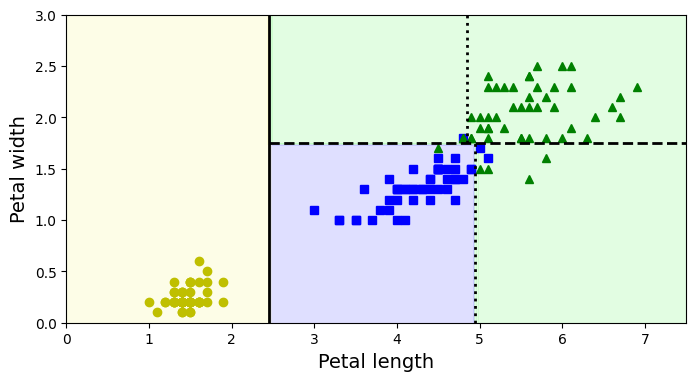

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# plt.text(1.40, 1.0, "Depth=0", fontsize=15)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([2])

In [10]:
from  mlxtend.plotting import plot_decision_regions

In [12]:
pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


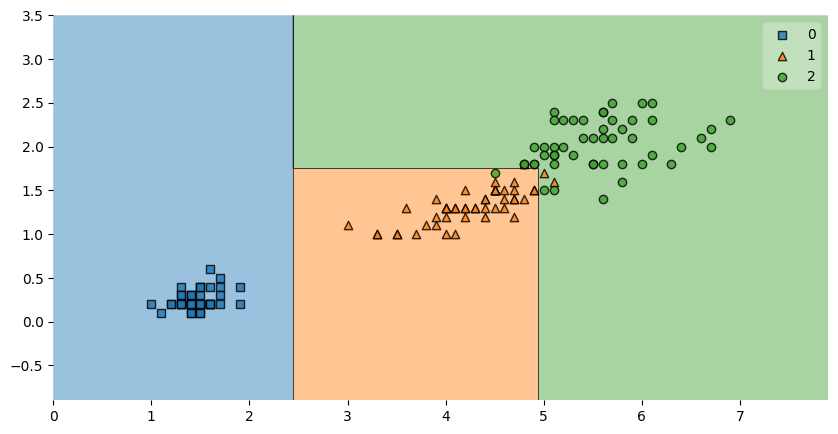

In [11]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf)
plt.show()

# Zad.

Naucz 

```pyrhon
DecisionTreeClassifier(max_depth=10, random_state=42)
```

* narysuj graf
* narysuj punkty oraz granice decyzyjne

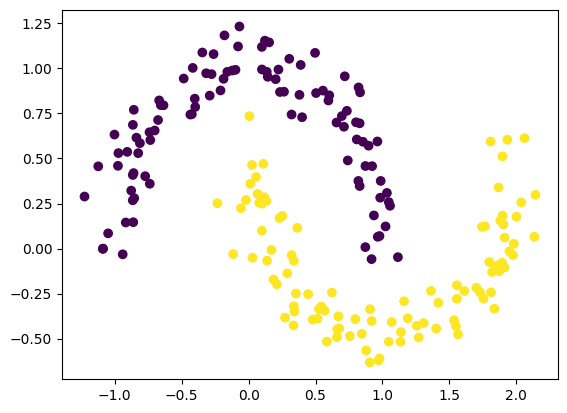

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

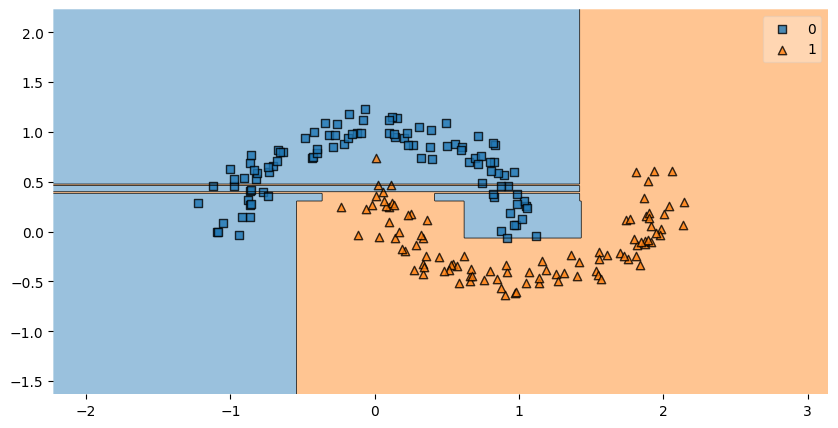

[Text(0.46875, 0.9444444444444444, 'x[1] <= 0.306\ngini = 0.5\nsamples = 200\nvalue = [100, 100]'),
 Text(0.125, 0.8333333333333334, 'x[0] <= -0.544\ngini = 0.288\nsamples = 109\nvalue = [19, 90]'),
 Text(0.0625, 0.7222222222222222, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.1875, 0.7222222222222222, 'x[1] <= -0.063\ngini = 0.18\nsamples = 100\nvalue = [10, 90]'),
 Text(0.125, 0.6111111111111112, 'gini = 0.0\nsamples = 61\nvalue = [0, 61]'),
 Text(0.25, 0.6111111111111112, 'x[0] <= 0.618\ngini = 0.381\nsamples = 39\nvalue = [10, 29]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.3125, 0.5, 'x[0] <= 1.429\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(0.25, 0.3888888888888889, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.375, 0.3888888888888889, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.8125, 0.8333333333333334, 'x[0] <= 1.421\ngini = 0.196\nsamples = 91\nvalue = [81, 10]'),
 Text(0.75, 0.7222222222222222, 'x[1] <= 0.48\

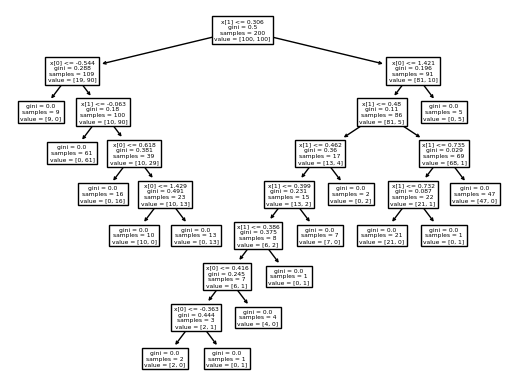

In [13]:
tree_clf1 = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf1.fit(X, y)

plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf1)
plt.show()

from sklearn import tree
tree.plot_tree(tree_clf1)

In [14]:
!dot -Tpng moons_tree.dot -o moons_tree.png

Error: dot: can't open moons_tree.dot


# Zad.

Porównaj wyniki z 

```python
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
```

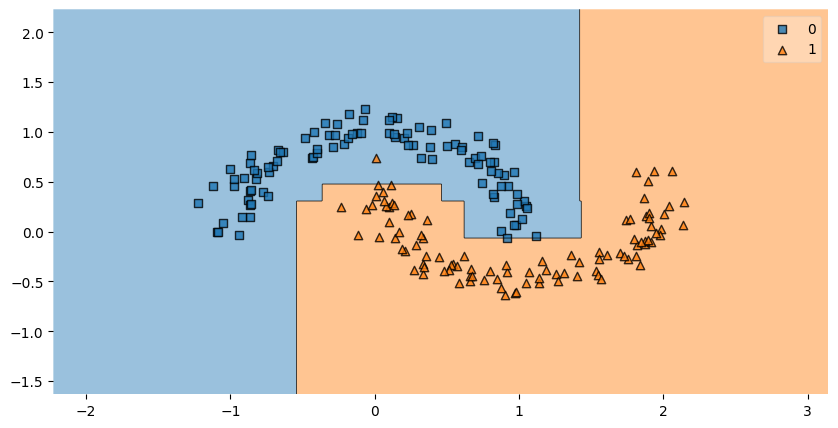

[Text(0.4375, 0.9166666666666666, 'x[1] <= 0.306\ngini = 0.5\nsamples = 200\nvalue = [100, 100]'),
 Text(0.125, 0.75, 'x[0] <= -0.544\ngini = 0.288\nsamples = 109\nvalue = [19, 90]'),
 Text(0.0625, 0.5833333333333334, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.1875, 0.5833333333333334, 'x[1] <= -0.063\ngini = 0.18\nsamples = 100\nvalue = [10, 90]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 61\nvalue = [0, 61]'),
 Text(0.25, 0.4166666666666667, 'x[0] <= 0.618\ngini = 0.381\nsamples = 39\nvalue = [10, 29]'),
 Text(0.1875, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.3125, 0.25, 'x[0] <= 1.429\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.75, 0.75, 'x[0] <= 1.421\ngini = 0.196\nsamples = 91\nvalue = [81, 10]'),
 Text(0.6875, 0.5833333333333334, 'x[1] <= 0.48\ngini = 0.11\nsamples = 8

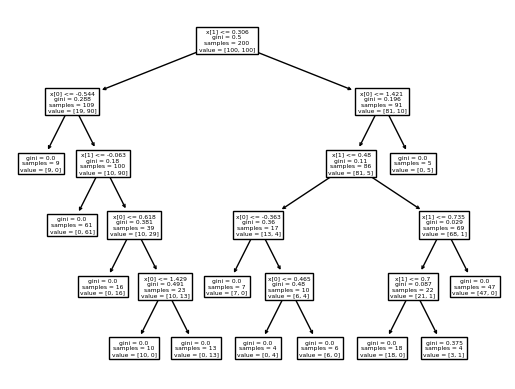

In [15]:
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf2.fit(X, y)

plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf2)
plt.show()

from sklearn import tree
tree.plot_tree(tree_clf2)

In [ ]:
!dot -Tpng moons_tree2.dot -o moons_tree2.png

# Zad 

Dla obu wyników policz 

* precision
* recall
* f1-score
* accuracy
* roc_auc_score

i narysuj krzywą roc

precision_score: 0.7363761558134959
recall_score: 0.7486
f1_score: 0.7424377665377369
accuracy_score: 0.7403
precision_score: 0.7403


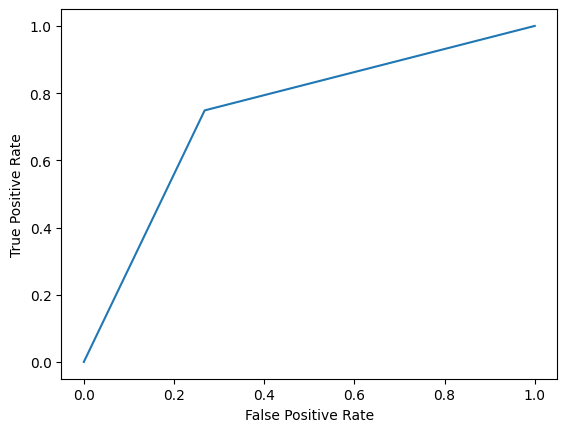

In [16]:
from sklearn import  metrics

X_test, y_test = make_moons(n_samples=20000, noise=.7, random_state=10)

print("precision_score: {}".format(metrics.precision_score(y_test, tree_clf1.predict(X_test)) ))
print("recall_score: {}".format( metrics.recall_score(y_test, tree_clf1.predict(X_test)) ))
print("f1_score: {}".format( metrics.f1_score(y_test, tree_clf1.predict(X_test)) ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, tree_clf1.predict(X_test)) ))
print("precision_score: {}".format(metrics.roc_auc_score(y_test, tree_clf1.predict(X_test)) ))

y_pred_proba = tree_clf1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

precision_score: 0.738177510119459
recall_score: 0.7477
f1_score: 0.7429082418401312
accuracy_score: 0.74125
precision_score: 0.7412500000000001


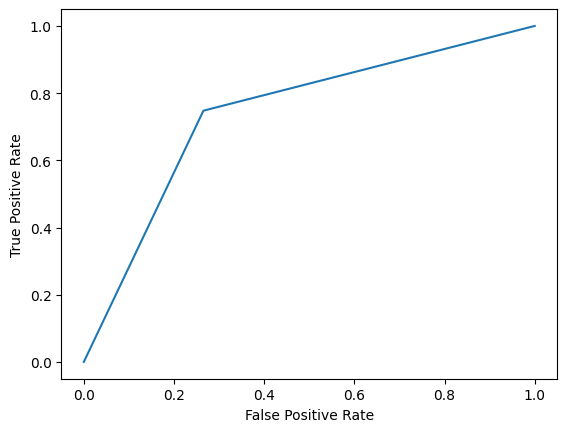

In [17]:
print("precision_score: {}".format(metrics.precision_score(y_test, tree_clf2.predict(X_test)) ))
print("recall_score: {}".format( metrics.recall_score(y_test, tree_clf2.predict(X_test)) ))
print("f1_score: {}".format( metrics.f1_score(y_test, tree_clf2.predict(X_test)) ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, tree_clf2.predict(X_test)) ))
print("precision_score: {}".format(metrics.roc_auc_score(y_test, tree_clf2.predict(X_test)) ))

y_pred_proba = tree_clf2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()